In [8]:
import pandas as pd

df = pd.read_csv('data/housing_data_sample.csv', index_col='Id')
df.head()

,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
Id,,,,,,,,
1,8450,2003,2,8,548,856,854,208500
2,9600,1976,2,6,460,1262,0,181500
3,11250,2001,2,6,608,920,866,223500
4,9550,1915,1,7,642,961,756,140000
5,14260,2000,2,9,836,1145,1053,250000


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
km = KMeans()
km.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=None, tol=0.0001,
       verbose=0)

In [25]:
k_values = list(range(2, 20))
inertias = []

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    inertias.append(km.inertia_)

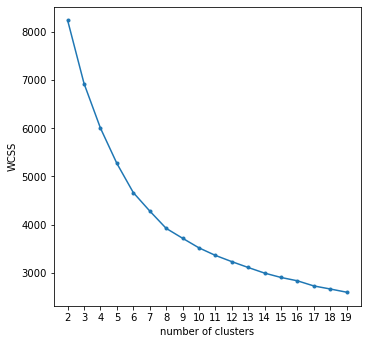

In [26]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(5.5, 5.5))
plt.plot(k_values, inertias, marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.savefig('B17030_17_01.png', dpi=300)

Text(0, 0.5, 'WCSS differential')

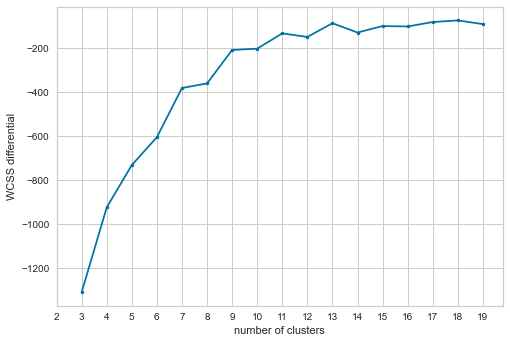

In [51]:
import numpy as np

plt.plot(k_values[1:], np.diff(inertias), marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.ylabel('WCSS differential')

In [43]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_values = list(range(2, 20))
inertias = []
sil_scores = []
ch_scores = []

for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(scaled_df, km.labels_))
    ch_scores.append(calinski_harabasz_score(scaled_df, km.labels_))

Text(0, 0.5, 'Silhouette score')

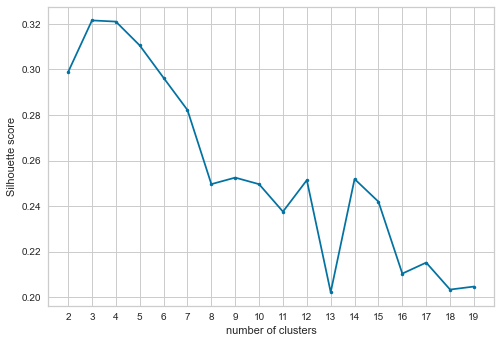

In [46]:
plt.plot(k_values, sil_scores, marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.ylabel('Silhouette score')

Text(0, 0.5, 'Calinski Harabasz score')

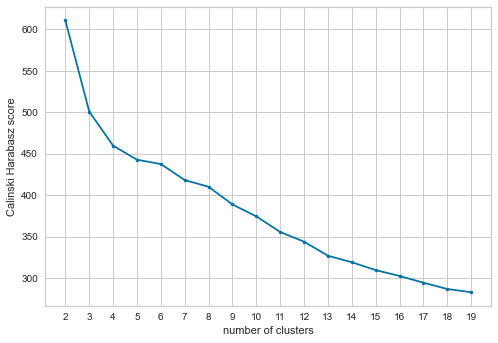

In [45]:
plt.plot(k_values, ch_scores, marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.ylabel('Calinski Harabasz score')

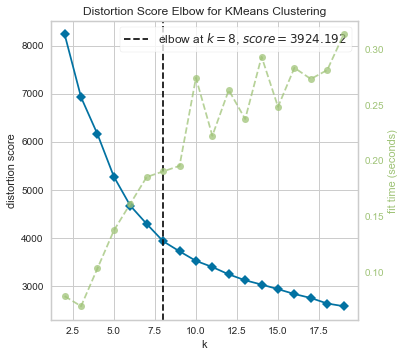

In [53]:
from yellowbrick.cluster.elbow import kelbow_visualizer

f = plt.figure(figsize=(5.5, 5.5))
viz = kelbow_visualizer(KMeans(), scaled_df, k=(2, 20), show=False)
plt.savefig('B17030_17_02.png', dpi=300)

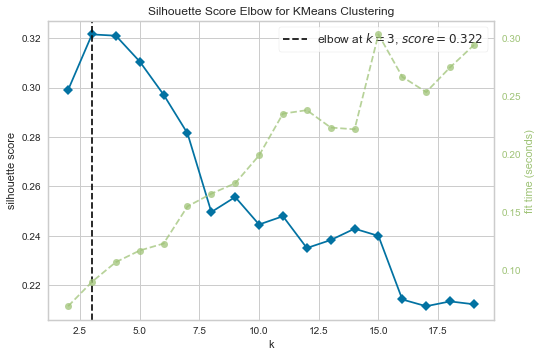

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=19,
                                  n_init=10, n_jobs='deprecated',
                                  precompute_distances='deprecated',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='silhouette', timings=True)

In [47]:
kelbow_visualizer(KMeans(), scaled_df, k=(2, 20), metric='silhouette')

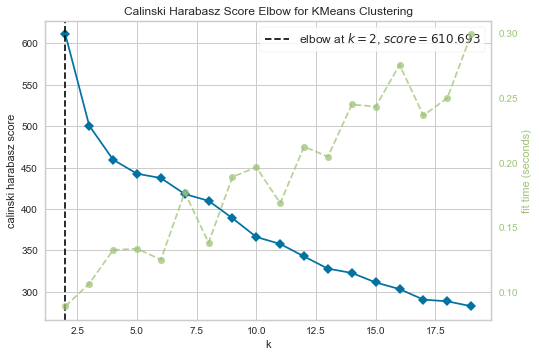

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=19,
                                  n_init=10, n_jobs='deprecated',
                                  precompute_distances='deprecated',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 timings=True)

In [48]:
kelbow_visualizer(KMeans(), scaled_df, k=(2, 20), metric='calinski_harabasz')

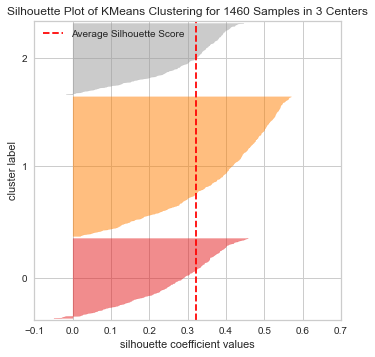

In [55]:
from yellowbrick.cluster import silhouette_visualizer

f = plt.figure(figsize=(5.5, 5.5))
viz = silhouette_visualizer(KMeans(3, random_state=42), scaled_df, show=False)
plt.savefig('B17030_17_03.png', dpi=300)

In [56]:
km = KMeans(3, random_state=42)
km.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=42, tol=0.0001,
       verbose=0)

In [61]:
df_labels = df.copy()
df_labels['label'] = km.labels_

for label in range(3):
    print(f'cluster {label}:')
    print(df_labels[df_labels['label'] == label].mean(), '\n')

cluster 0:
LotArea          11100.957606
YearBuilt         1983.097257
FullBath             2.049875
TotRmsAbvGrd         7.945137
GarageArea         551.256858
1stFlrSF          1074.279302
2ndFlrSF           921.137157
SalePrice       223219.441397
label                0.000000
dtype: float64 

cluster 1:
LotArea           8717.477889
YearBuilt         1953.158345
FullBath             1.088445
TotRmsAbvGrd         5.596291
GarageArea         357.379458
1stFlrSF           980.592011
2ndFlrSF           181.263909
SalePrice       129434.780314
label                1.000000
dtype: float64 

cluster 2:
LotArea          13385.846369
YearBuilt         1993.477654
FullBath             1.955307
TotRmsAbvGrd         6.723464
GarageArea         611.659218
1stFlrSF          1618.027933
2ndFlrSF            28.399441
SalePrice       234358.013966
label                2.000000
dtype: float64 



<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

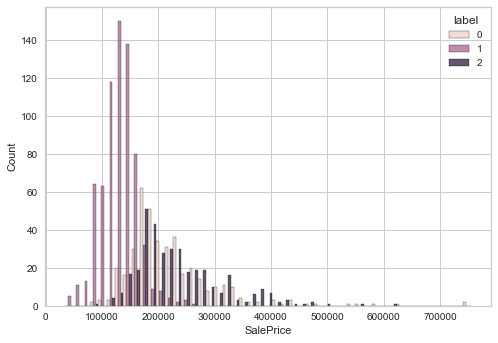

In [78]:
import seaborn as sns

sns.histplot(df_labels, x='SalePrice', hue='label', multiple='dodge')

In [86]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca_df = pca.fit_transform(scaled_df)

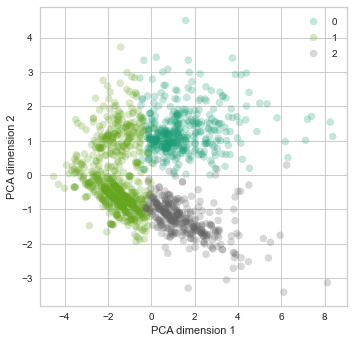

In [91]:
f = plt.figure(figsize=(5.5, 5.5))
scatter = plt.scatter(pca_df[:, 0], pca_df[:, 1], c=km.labels_, cmap='Dark2', alpha=0.25)
plt.legend(*scatter.legend_elements())
plt.xlabel('PCA dimension 1')
plt.ylabel('PCA dimension 2')
plt.savefig('B17030_17_04.png', dpi=300)

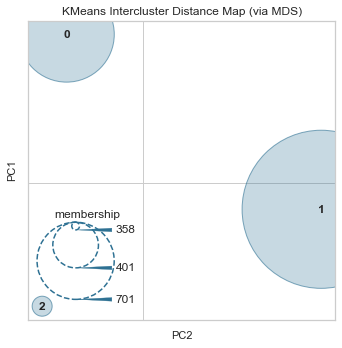

In [88]:
from yellowbrick.cluster import intercluster_distance

f = plt.figure(figsize=(5.5, 5.5))
viz = intercluster_distance(km, scaled_df, random_state=42, show=False)
plt.savefig('B17030_17_05.png', dpi=300)

# Hierarchical clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

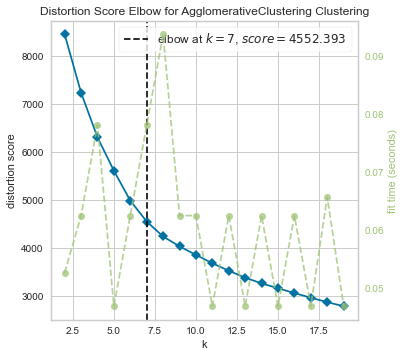

In [120]:
f = plt.figure(figsize=(5.5, 5.5))
viz = kelbow_visualizer(AgglomerativeClustering(), scaled_df, k=(2, 20), show=False)
plt.savefig('B17030_17_06.png', dpi=300)

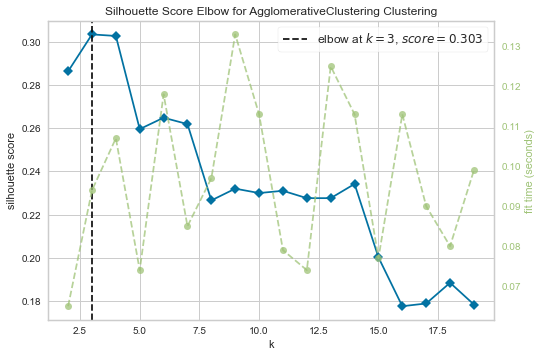

In [121]:
viz = kelbow_visualizer(AgglomerativeClustering(), scaled_df, metric='silhouette', k=(2, 20), show=False)

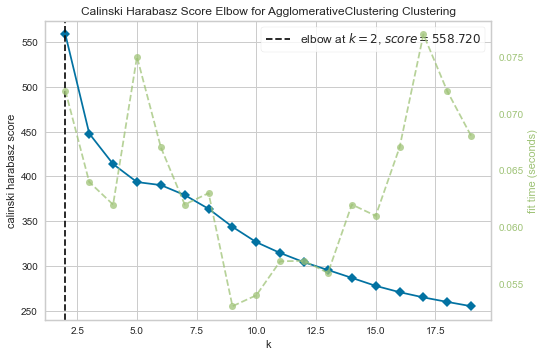

In [122]:
viz = kelbow_visualizer(AgglomerativeClustering(), scaled_df, metric='calinski_harabasz', k=(2, 20), show=False)

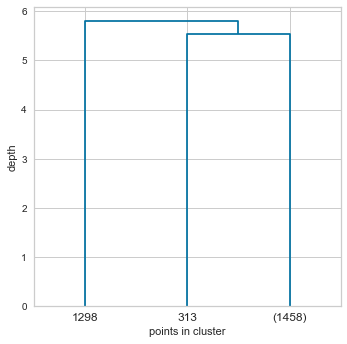

In [131]:
from scipy.cluster.hierarchy import dendrogram, linkage

f = plt.figure(figsize=(5.5, 5.5))
_ = dendrogram(linkage(scaled_df), truncate_mode='lastp', p=3)
plt.xlabel('points in cluster')
plt.ylabel('depth')
plt.savefig('B17030_17_07.png', dpi=300)

# DBSCAN

In [337]:
from sklearn.neighbors import NearestNeighbors

core_points = scaled_df.shape[1] * 2
nn = NearestNeighbors(n_neighbors=core_points + 1)
nn = nn.fit(scaled_df)
distances, neighbors = nn.kneighbors(scaled_df)
average_distances = distances[:, 1:].mean(axis=1)
average_distances.sort()

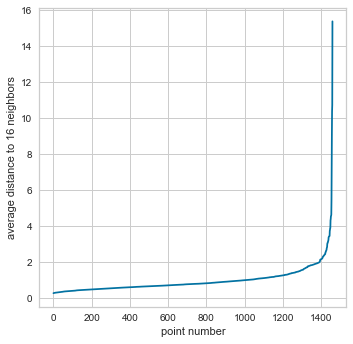

In [338]:
f = plt.figure(figsize=(5.5, 5.5))
plt.plot(average_distances)
plt.xlabel('point number')
plt.ylabel(f'average distance to {core_points} neighbors')
plt.savefig('B17030_17_08.png', dpi=300)

In [339]:
from kneed import KneeLocator

kneedle = KneeLocator(range(average_distances.shape[0]), average_distances, curve="convex", direction="increasing")

In [340]:
kneedle.knee

1421

In [341]:
eps = average_distances[kneedle.knee]
eps

2.434228927106824

In [342]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=eps, min_samples=core_points, n_jobs=-1)
db.fit(scaled_df)

DBSCAN(algorithm='auto', eps=2.434228927106824, leaf_size=30,
       metric='euclidean', metric_params=None, min_samples=16, n_jobs=-1,
       p=None)

In [343]:
np.unique(db.labels_)

array([-1,  0], dtype=int64)

In [344]:
silhouette_score(scaled_df, db.labels_)

0.5774779898250977

In [349]:
from sklearn.cluster import OPTICS

ot = OPTICS(xi=0.5, n_jobs=-1)
ot.fit(scaled_df)
np.unique(ot.labels_)

array([-1,  0,  1])

In [350]:
silhouette_score(scaled_df, ot.labels_)

-0.07191235976252319